In [34]:
#Installing the required library
!pip install ucimlrepo

In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# metadata
print(chronic_kidney_disease.metadata)

# variable information
print(chronic_kidney_disease.variables)

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [5]:
x=(chronic_kidney_disease.data.original)
df1=pd.DataFrame(x)
df1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [6]:
#Recognizing the null symbol
df2=chronic_kidney_disease.metadata.missing_values_symbol
df2

'NaN'

In [7]:
#Defining the symbol for each unit
df3=chronic_kidney_disease.variables.units
df3

0             year
1            mm/Hg
2             None
3             None
4             None
5             None
6             None
7             None
8             None
9           mgs/dl
10          mgs/dl
11          mgs/dl
12           mEq/L
13           mEq/L
14             gms
15            None
16       cells/cmm
17    millions/cmm
18            None
19            None
20            None
21            None
22            None
23            None
24            None
Name: units, dtype: object

In [8]:
#Renaming the columns to understand labels
df1.rename(columns={'bp':'BloodPressure',\
                    'sg':'SpecificGravity',\
                    'al':'Albumin',\
                    'su':'Sugar',\
                    'rbc':'redBloodCells',\
                    'pc':'pus cell',\
                    'pcc':'pus cell clumps',\
                    'ba':'bacteria',\
                    'bgr':'blood glucose random',\
                    'bu':'blood urea',\
                    'sc':'serum creatinine',\
                    'sod':'sodium',\
                    'pot':'potassium',\
                    'hemo':'hemoglobin',\
                    'pcv':'packed cell volume',\
                    'wbcc':'white blood cell count',\
                    'rbcc':'red blood cell count',\
                    'htn':'hypertension',\
                    'dm':'diabetes melitus',\
                    'cad':'coronary artery disease',\
                    'appet':'appetite',\
                    'pe':'pedal edema',\
                    'ane':'anemia',\
                    'class':'ckd or not ckd'},\
            inplace=True)
print(df1)

      age  BloodPressure  SpecificGravity  Albumin  Sugar redBloodCells  \
0    48.0           80.0            1.020      1.0    0.0           NaN   
1     7.0           50.0            1.020      4.0    0.0           NaN   
2    62.0           80.0            1.010      2.0    3.0        normal   
3    48.0           70.0            1.005      4.0    0.0        normal   
4    51.0           80.0            1.010      2.0    0.0        normal   
..    ...            ...              ...      ...    ...           ...   
395  55.0           80.0            1.020      0.0    0.0        normal   
396  42.0           70.0            1.025      0.0    0.0        normal   
397  12.0           80.0            1.020      0.0    0.0        normal   
398  17.0           60.0            1.025      0.0    0.0        normal   
399  58.0           80.0            1.025      0.0    0.0        normal   

     pus cell pus cell clumps    bacteria  blood glucose random  ...  \
0      normal      notprese

In [9]:
print(df1['ckd or not ckd'].unique())

['ckd' 'ckd\t' 'notckd']


In [10]:
df1['ckd or not ckd'] = df1['ckd or not ckd'].replace('ckd\t', 'ckd')

In [11]:
#Statistics of the dataset
df1.describe()

,age,BloodPressure,SpecificGravity,Albumin,Sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [12]:
#Datatypes of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   BloodPressure            388 non-null    float64
 2   SpecificGravity          353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   redBloodCells            248 non-null    object 
 6   pus cell                 335 non-null    object 
 7   pus cell clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood urea               381 non-null    float64
 11  serum creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [13]:
#Counting null values in each column
df1.isnull().sum()

age                          9
BloodPressure               12
SpecificGravity             47
Albumin                     46
Sugar                       49
redBloodCells              152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          71
white blood cell count     106
red blood cell count       131
hypertension                 2
diabetes melitus             2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
ckd or not ckd               0
dtype: int64

In [14]:
# handle missing values: replace  object na with the mod and if it is numeric replace with mean

for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].fillna(df1[col].mode()[0])
    elif pd.api.types.is_numeric_dtype(df1[col]):
        df1[col] = df1[col].fillna(df1[col].mean())
df1.head()

,age,BloodPressure,SpecificGravity,Albumin,Sugar,redBloodCells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes melitus,coronary artery disease,appetite,pedal edema,anemia,ckd or not ckd
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [15]:
#checking for not_Cleaned_Data
df1.isnull().sum()

age                        0
BloodPressure              0
SpecificGravity            0
Albumin                    0
Sugar                      0
redBloodCells              0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes melitus           0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
ckd or not ckd             0
dtype: int64

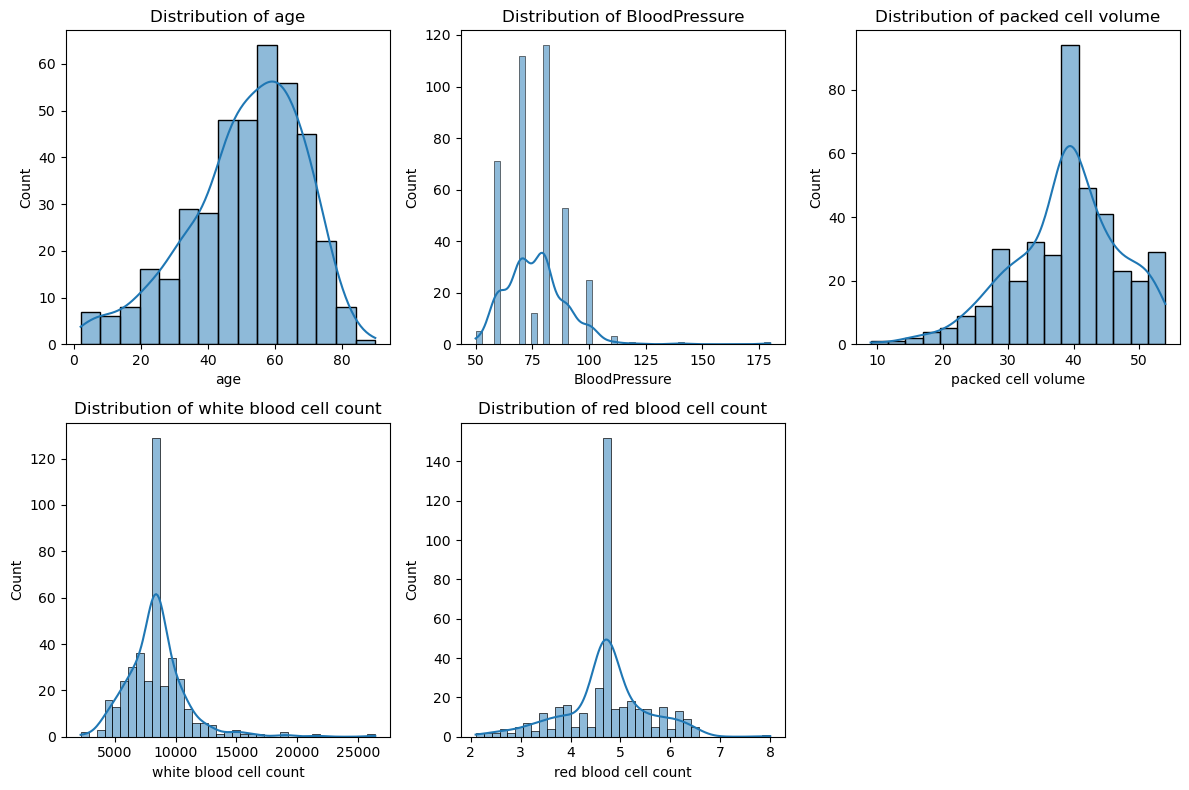

In [16]:
# Count plot for some features
numeric_features = ['age', 'BloodPressure', 'packed cell volume', 'white blood cell count', 'red blood cell count']
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df1[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

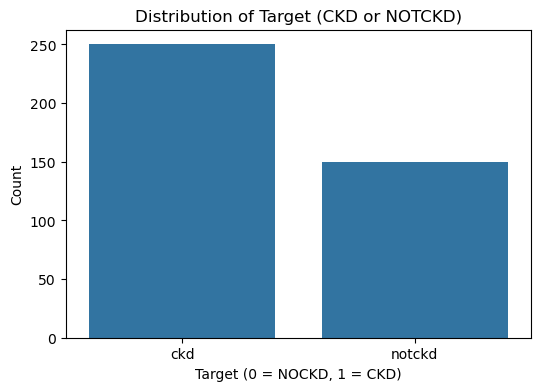

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='ckd or not ckd', data=df1)
plt.title('Distribution of Target (CKD or NOTCKD)')
plt.xlabel('Target (0 = NOCKD, 1 = CKD)')
plt.ylabel('Count')
plt.show()

In [18]:
#Encoding Categorial Features
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [19]:
print(df1['diabetes melitus'].unique())

['yes' 'no' '\tno']


In [20]:
df1['diabetes melitus'] = df1['diabetes melitus'].replace('\tno', 'no')
df1

,age,BloodPressure,SpecificGravity,Albumin,Sugar,redBloodCells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes melitus,coronary artery disease,appetite,pedal edema,anemia,ckd or not ckd
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.900000,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.200000,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.400000,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.900000,no,no,no,good,no,no,notckd


In [21]:
ohetransform=ohe.fit_transform(df1[['diabetes melitus','anemia']])
ohetransform

,diabetes melitus_no,diabetes melitus_yes,anemia_no,anemia_yes
0,0.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
395,1.0,0.0,1.0,0.0
396,1.0,0.0,1.0,0.0
397,1.0,0.0,1.0,0.0
398,1.0,0.0,1.0,0.0


In [22]:
encoded_df1=pd.concat([df1,ohetransform],axis=1).drop(columns=['diabetes melitus','anemia'])
print(encoded_df1)

      age  BloodPressure  SpecificGravity  Albumin  Sugar redBloodCells  \
0    48.0           80.0            1.020      1.0    0.0        normal   
1     7.0           50.0            1.020      4.0    0.0        normal   
2    62.0           80.0            1.010      2.0    3.0        normal   
3    48.0           70.0            1.005      4.0    0.0        normal   
4    51.0           80.0            1.010      2.0    0.0        normal   
..    ...            ...              ...      ...    ...           ...   
395  55.0           80.0            1.020      0.0    0.0        normal   
396  42.0           70.0            1.025      0.0    0.0        normal   
397  12.0           80.0            1.020      0.0    0.0        normal   
398  17.0           60.0            1.025      0.0    0.0        normal   
399  58.0           80.0            1.025      0.0    0.0        normal   

     pus cell pus cell clumps    bacteria  blood glucose random  ...  \
0      normal      notprese

In [23]:
#Selecting some features
selected_columns = encoded_df1[['age',
                        'BloodPressure',
                        'Albumin',
                        'anemia_no',
                        'anemia_yes',
                        'diabetes melitus_no',
                        'diabetes melitus_yes',
                        'white blood cell count',
                        'red blood cell count']]
print(selected_columns)


      age  BloodPressure  Albumin  anemia_no  anemia_yes  diabetes melitus_no  \
0    48.0           80.0      1.0        1.0         0.0                  0.0   
1     7.0           50.0      4.0        1.0         0.0                  1.0   
2    62.0           80.0      2.0        0.0         1.0                  0.0   
3    48.0           70.0      4.0        0.0         1.0                  1.0   
4    51.0           80.0      2.0        1.0         0.0                  1.0   
..    ...            ...      ...        ...         ...                  ...   
395  55.0           80.0      0.0        1.0         0.0                  1.0   
396  42.0           70.0      0.0        1.0         0.0                  1.0   
397  12.0           80.0      0.0        1.0         0.0                  1.0   
398  17.0           60.0      0.0        1.0         0.0                  1.0   
399  58.0           80.0      0.0        1.0         0.0                  1.0   

     diabetes melitus_yes  

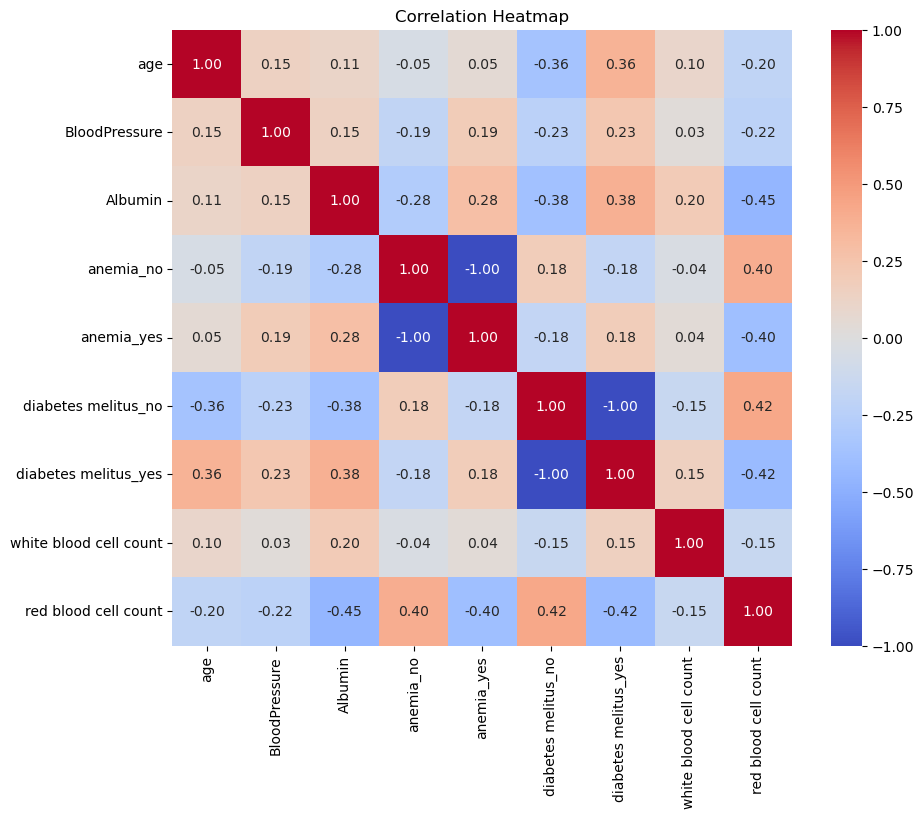

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(selected_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

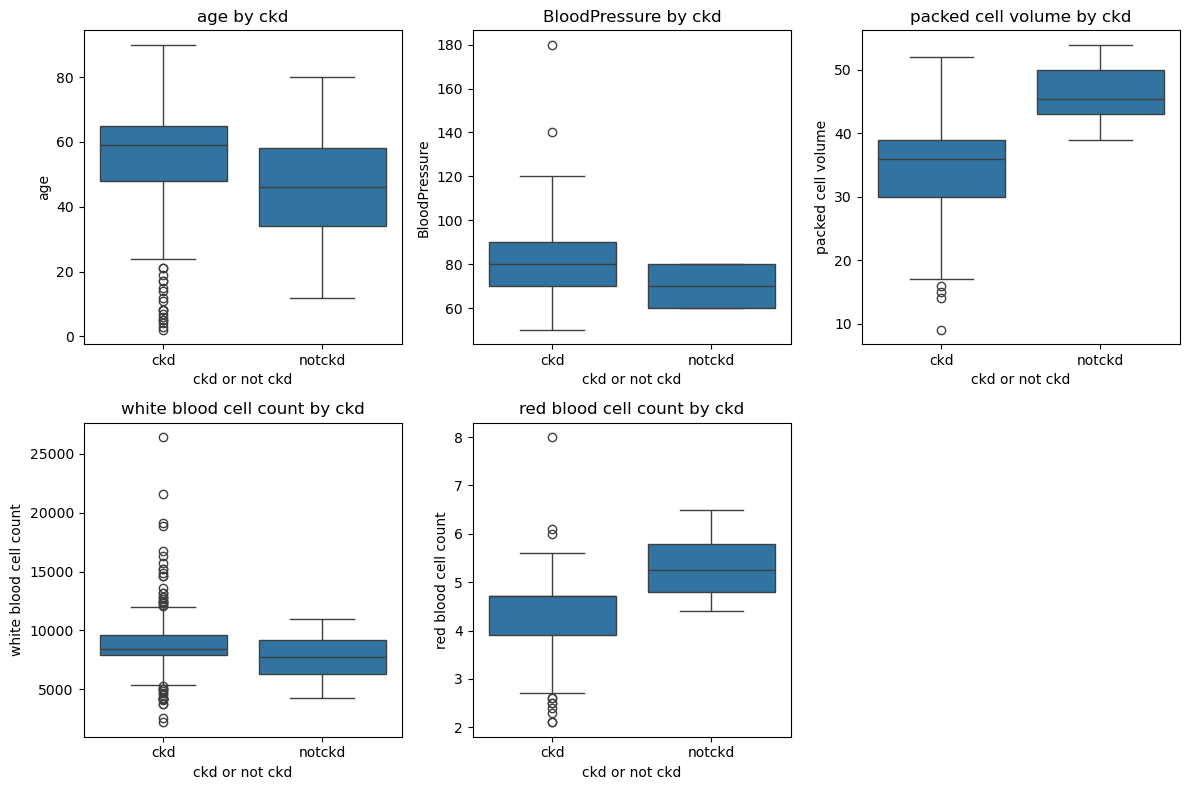

In [25]:
# Box plots to check for outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='ckd or not ckd', y=column, data=df1)
    plt.title(f'{column} by ckd')
plt.tight_layout()
plt.show()

In [26]:
# --- 2. Preprocessing ---


X = selected_columns
y = df1['ckd or not ckd']

In [27]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (320, 9)
Testing set shape: (80, 9)



Confusion Matrix:
[[50  2]
 [ 2 26]]

Classification Report:
              precision    recall  f1-score   support

         ckd       0.96      0.96      0.96        52
      notckd       0.93      0.93      0.93        28

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



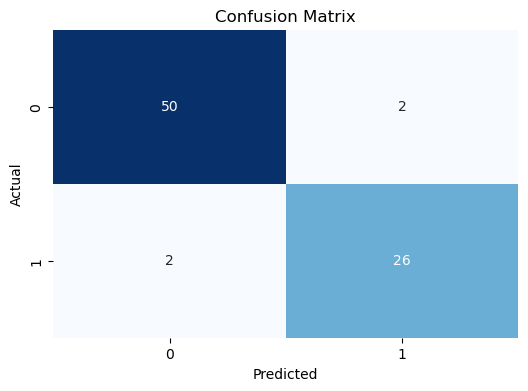

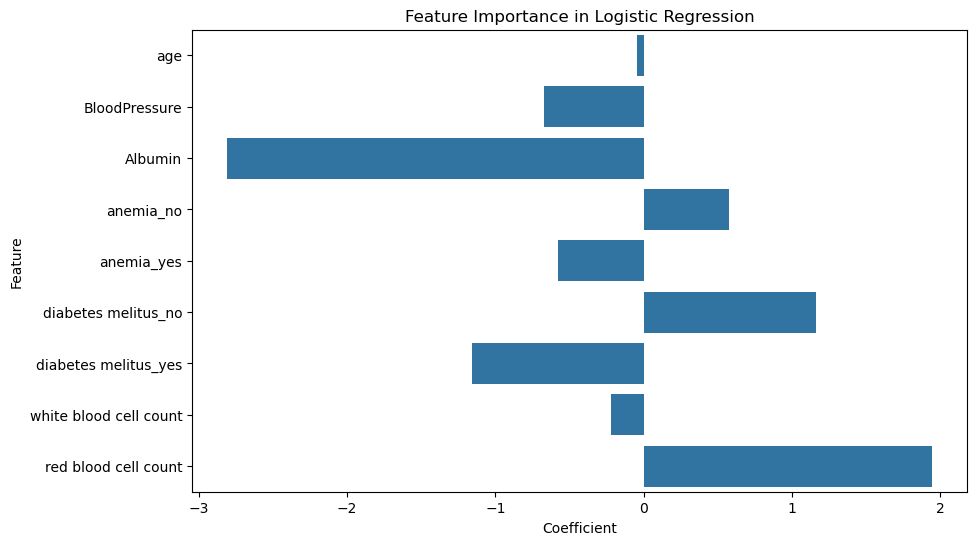

In [29]:
# --- 3. Logistic Regression ---

#  train model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# --- 4. Evaluation ---

# Confusion Matrix
# Convert y_test to numerical values for evaluation
y_test_numeric = y_test.map({'ckd': 1, 'notckd': 0})
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# --- Feature Importance ---
# Get feature coefficients and create a DataFrame
coef_df1 = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': log_reg.coef_[0]})

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df1)
plt.title('Feature Importance in Logistic Regression')
plt.show()

<h1>Assignment2</h1>

In [31]:

# -----------------------------
# K-Nearest Neighbors Classifier
# -----------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X and y are already defined and preprocessed
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


KNN Classification Report:
              precision    recall  f1-score   support

         ckd       0.98      0.96      0.97        52
      notckd       0.93      0.96      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80

KNN Confusion Matrix:
[[50  2]
 [ 1 27]]


In [32]:

# -----------------------------
# K-Nearest Neighbors (KNN) - Full Task Implementation
# -----------------------------

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Step 1: Split into train (60%), validation (20%), test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  # 0.25 * 0.8 = 0.2

# Step 2: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 3: Try different values of K and find the best one
best_k = 1
best_accuracy = 0
validation_accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_val_pred = knn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append((k, acc))
    print(f"K={k}, Validation Accuracy={acc:.4f}")
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k

print(f"\nBest K found: {best_k} with validation accuracy of {best_accuracy:.4f}")

# Step 4: Retrain on train+val with best K and evaluate on test set
X_trainval_scaled = scaler.fit_transform(pd.concat([X_train, X_val]))
y_trainval = pd.concat([y_train, y_val])

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_trainval_scaled, y_trainval)
X_test_scaled_final = scaler.transform(X_test)
y_test_pred = final_knn.predict(X_test_scaled_final)

print("\nFinal Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


K=1, Validation Accuracy=0.9125
K=2, Validation Accuracy=0.9000
K=3, Validation Accuracy=0.9125
K=4, Validation Accuracy=0.9125
K=5, Validation Accuracy=0.9125
K=6, Validation Accuracy=0.9375
K=7, Validation Accuracy=0.9375
K=8, Validation Accuracy=0.9500
K=9, Validation Accuracy=0.9250
K=10, Validation Accuracy=0.9125
K=11, Validation Accuracy=0.9250
K=12, Validation Accuracy=0.9250
K=13, Validation Accuracy=0.9375
K=14, Validation Accuracy=0.9250
K=15, Validation Accuracy=0.9125
K=16, Validation Accuracy=0.9250
K=17, Validation Accuracy=0.9125
K=18, Validation Accuracy=0.9125
K=19, Validation Accuracy=0.9250
K=20, Validation Accuracy=0.9250

Best K found: 8 with validation accuracy of 0.9500

Final Evaluation on Test Set:
Accuracy: 0.925
Classification Report:
              precision    recall  f1-score   support

         ckd       0.92      0.96      0.94        50
      notckd       0.93      0.87      0.90        30

    accuracy                           0.93        80
   macro 

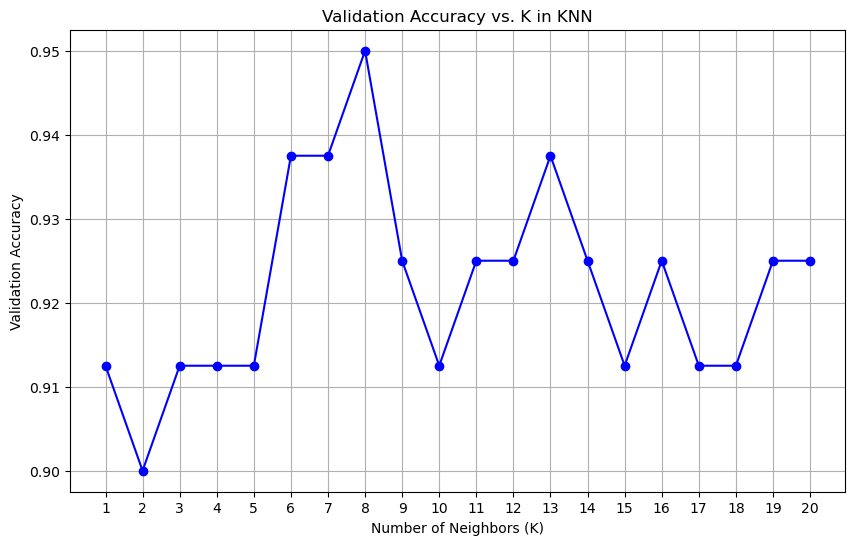

In [33]:

# -----------------------------
# Plotting K vs Validation Accuracy
# -----------------------------
import matplotlib.pyplot as plt

k_values = [k for k, acc in validation_accuracies]
accuracies = [acc for k, acc in validation_accuracies]

plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Validation Accuracy vs. K in KNN')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [34]:
#KFold Cross-Validation with 5 Folds
#Importing the libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [35]:
#Applying KFold Algorithm with 5 Folds and printing Cross Validation Scores
kf=KFold(n_splits=5,shuffle=True,random_state=42)
cv_scores = cross_val_score(final_knn, X_train, y_train, cv=kf,)
print("KFold CV Scores:", cv_scores)
print(f"""Kfold CV Scores Average: {cv_scores.mean():.2f}""")

KFold CV Scores: [0.60416667 0.72916667 0.6875     0.625      0.75      ]
Kfold CV Scores Average: 0.68


In [36]:
#Testing the model and printing accuracies
y_test_pred= final_knn.predict(X_test_scaled)
test_accuracy=accuracy_score(y_test,y_test_pred)
results={
    "Cross validation":np.mean(cv_scores),
    "Validation set ":best_accuracy,
    "test set":test_accuracy
}
pd.DataFrame.from_dict(results,orient='index',columns=['Accuracy']).sort_values(by='Accuracy',ascending=False)

,Accuracy
Validation set,0.950000
test set,0.925000
Cross validation,0.679167


In [37]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming 'final_knn', 'X_test_scaled', and 'y_test' are already defined

# Predict on the test set
y_test_pred = final_knn.predict(X_test_scaled)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, pos_label='ckd')  # Assuming 'ckd' is the positive label
recall = recall_score(y_test, y_test_pred, pos_label='ckd')
f1 = f1_score(y_test, y_test_pred, pos_label='ckd')

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Analyze the confusion matrix (example)
print("\nAnalysis:")
print("The model correctly predicted", conf_matrix[0, 0], "true negatives (patients without CKD).")
print("The model correctly predicted", conf_matrix[1, 1], "true positives (patients with CKD).")
print("The model incorrectly predicted", conf_matrix[0, 1], "false positives (healthy patients classified as having CKD).")
print("The model incorrectly predicted", conf_matrix[1, 0], "false negatives (patients with CKD classified as healthy).")

Confusion Matrix:
 [[48  2]
 [ 4 26]]

Accuracy: 0.925
Precision: 0.9230769230769231
Recall: 0.96
F1-score: 0.9411764705882353

Analysis:
The model correctly predicted 48 true negatives (patients without CKD).
The model correctly predicted 26 true positives (patients with CKD).
The model incorrectly predicted 2 false positives (healthy patients classified as having CKD).
The model incorrectly predicted 4 false negatives (patients with CKD classified as healthy).


In [38]:
#Check for Overfitting
# Train accuracy on the final model
y_trainval_pred = final_knn.predict(X_trainval_scaled)
train_accuracy = accuracy_score(y_trainval, y_trainval_pred)
 
print("Overfitting Check:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy (Best): {best_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracy - test_accuracy > 0.1:
    print("Potential Overfitting Detected: Model performs significantly better on training data.")
else:
    print("No major overfitting detected")

Overfitting Check:
Train Accuracy: 0.9187
Validation Accuracy (Best): 0.9500
Test Accuracy: 0.9250
No major overfitting detected


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Correct parameter grid: use list instead of set
param_grid = {
    'n_neighbors': list(range(1, 30)),
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# GridSearchCV
grid_search = GridSearchCV(knn,
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Best K and best score
print(f"Best K: {grid_search.best_params_['n_neighbors']}")
print(f"Best Metric: {grid_search.best_params_['metric']}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Evaluate on validation set
best_knn = grid_search.best_estimator_
val_accuracy = best_knn.score(X_val_scaled, y_val)
print(f"Validation Set Accuracy with Best K: {val_accuracy:.4f}")

Best K: 10
Best Metric: manhattan
Best Cross-Validation Accuracy: 0.9375
Validation Set Accuracy with Best K: 0.9375


In [40]:
# Remove highly correlated features
correlation_matrix = X.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Drop features with correlation > 0.9
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
X_reduced = X.drop(columns=to_drop)
print(f"Dropped Correlated Features: {to_drop}")

Dropped Correlated Features: ['anemia_yes', 'diabetes melitus_yes']


In [41]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_model = KNeighborsClassifier(n_neighbors=best_k)

cv_scores = cross_val_score(cv_model, X_trainval_scaled, y_trainval, cv=kf)
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.890625 0.875    0.875    0.9375   0.921875]
Mean CV Accuracy: 0.9000


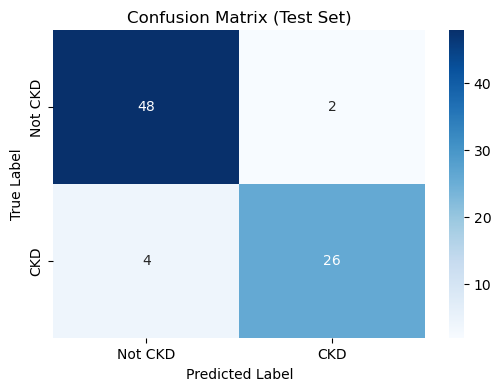

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not CKD', 'CKD'],
            yticklabels=['Not CKD', 'CKD'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

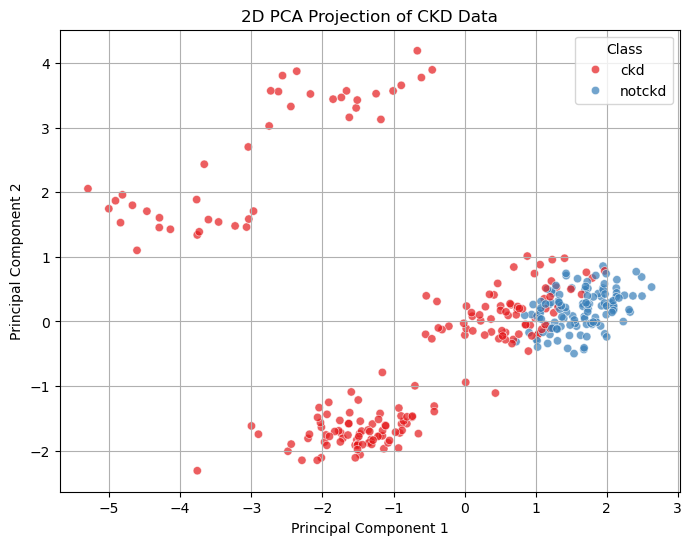

In [43]:
from sklearn.decomposition import PCA

# Apply PCA on scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_trainval_scaled)

# Reset index to align labels
y_vis = y_trainval.reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_vis, palette='Set1', alpha=0.7)
plt.title('2D PCA Projection of CKD Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.grid(True)
plt.show()

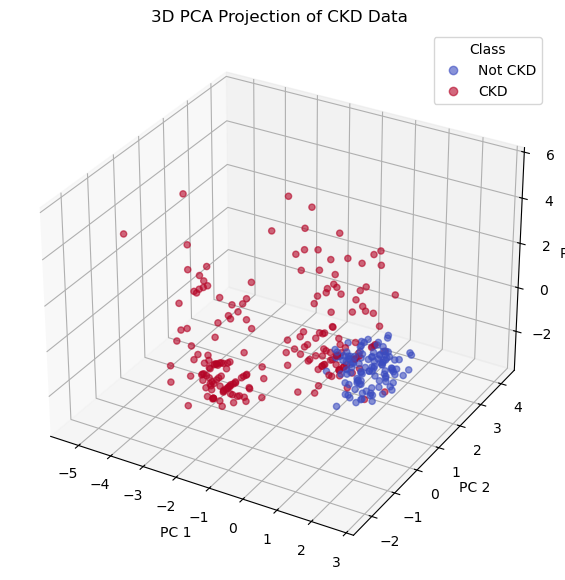

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_trainval_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_vis.map({'ckd': 1, 'notckd': 0}), cmap='coolwarm', alpha=0.6)

ax.set_title('3D PCA Projection of CKD Data')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.legend(handles=scatter.legend_elements()[0], labels=['Not CKD', 'CKD'], title='Class')
plt.show()